In [2]:
import pandas as pd
from os.path import join
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt
import sys
sys.path.append("../../")
from utils import load_samples
DATA_PATH = "/home/ecunha/omics-integration/results/ngaditana/PRJNA589063/"
from gsmmutils.model.COBRAmodel import MyModel

In [3]:
data = load_samples(DATA_PATH, methods = {'fastcore': 0.4, 'gimme':0.4}, samples=["C3", "C5", "N3", "N5", "P3", "P5"])

In [3]:
#sns.clustermap(data['fastcore'], cmap="viridis", z_score=0)

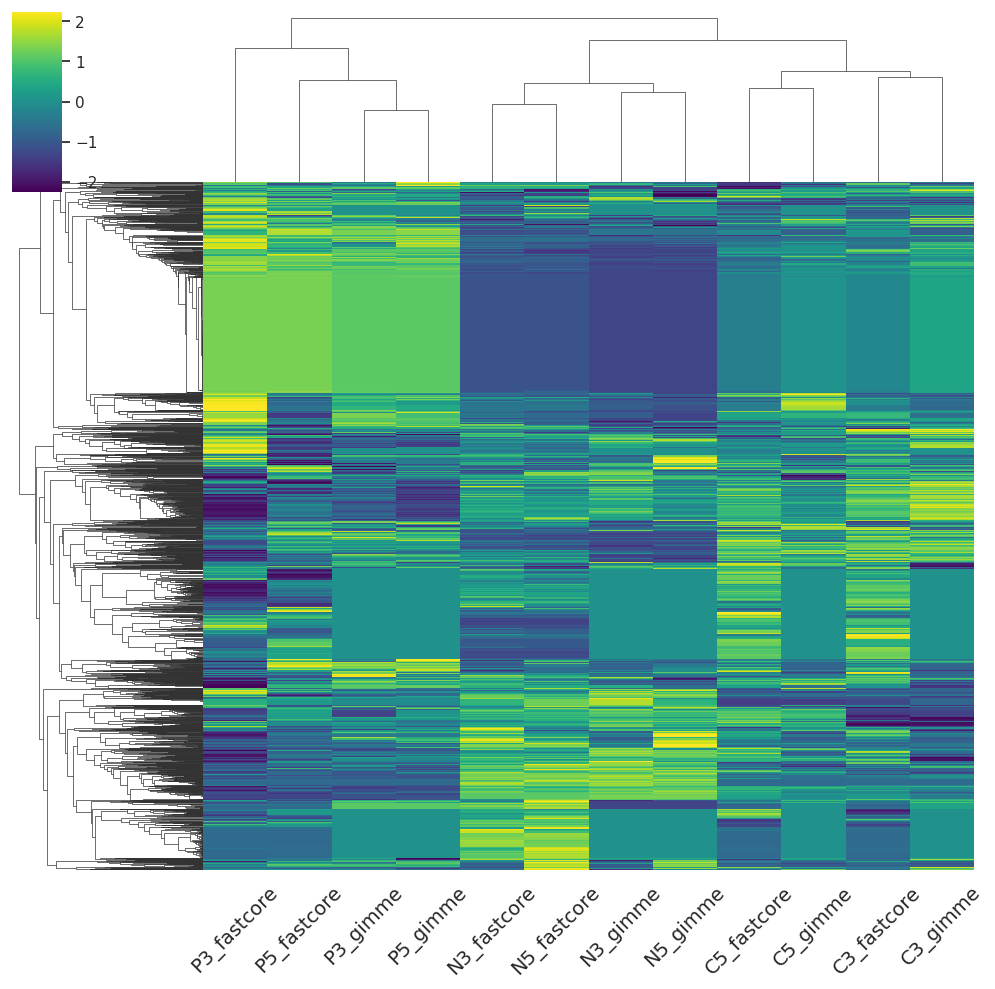

In [17]:
g= sns.clustermap(data['all'], cmap="viridis", yticklabels =False)

plt.setp(g.ax_heatmap.get_xticklabels(), rotation=45, fontsize=14)

print()

In [5]:
gimme = data['gimme']

In [293]:
(0.73-0.97)/(0.73+0.97)

-0.1411764705882353

In [5]:
gimme.loc[gimme.C3_gimme>300]

,C3_gimme,C5_gimme,N3_gimme,N5_gimme,P3_gimme,P5_gimme
R00112__chlo,723.711200,373.127467,543.972782,833.970736,762.114825,759.191121
R01325__mito,342.921065,32.760041,186.033622,241.471454,-390.664150,-72.898036
R02739__cytop,319.968562,-240.242826,-79.914528,287.666502,44.930662,-49.729331
R00112__cytop,675.663401,571.745971,462.471667,342.202606,529.661315,445.802762
R01975__mito,373.706294,377.718548,231.140103,527.829594,270.959275,227.133139
R01780__mito,373.699313,378.712985,230.922256,527.456834,272.220802,227.914923
R03321__cytop,319.965227,-240.245692,-79.915963,287.665071,44.929242,-49.730792
R00243__chlo,703.437640,346.552917,526.549612,799.958223,722.895126,722.033235
PRISM_white_LED__extr,994.770111,995.904863,995.557935,995.924615,995.650897,995.832989
R00248__chlo,702.078431,346.909405,526.420652,799.904669,723.909383,722.906125


In [15]:
gimme.loc["DM_C00422__lip"]

C3_gimme    0.007716
C5_gimme    0.004608
N3_gimme    0.078183
N5_gimme    0.063003
P3_gimme    0.002398
P5_gimme    0.002253
Name: DM_C00422__lip, dtype: float64

In [8]:
bmgr = gimme.loc[(gimme.index.str.startswith("BMGR")) &  (
                                                            (gimme.index.isin(model.pathway_reactions_map["BOIMMG (TAG)"])) |
                                                           ((gimme.index.isin(model.pathway_reactions_map["BOIMMG (DAG)"]))) |
                                                          ((gimme.index.isin(model.pathway_reactions_map["BOIMMG (PA)"])))
                                                         )]
bmgr = bmgr.filter(regex="N3|C3|P3|C5|P5|N5")
# bmgr = bmgr.filter(regex="N3|C3|C5|N5")
bmgr = bmgr.loc[~bmgr.index.str.contains("mem")]
row_std = bmgr.std(axis=1)
bmgr = bmgr[row_std != 0]
# bmgr = bmgr.loc[bmgr.index.isin(res.loc[abs(res.FC>0.67)].index)]
bmgr.head()

,C3_gimme,C5_gimme,N3_gimme,N5_gimme,P3_gimme,P5_gimme
BMGR6355__er,0.000074,0.000073,0.000032,0.000024,0.000235,0.000150
BMGR3616__er,0.142435,0.108804,0.113254,0.108814,0.081507,0.077455
BMGR0422__chlo,0.003058,0.003325,0.006241,0.001892,0.005092,0.005557
BMGR6251__chlo,0.002774,0.003238,0.001177,0.000604,0.006259,0.006006
BMGR5829__lip,0.509691,0.375625,0.397702,0.396772,0.253618,0.250516


In [437]:
gimme.loc["EX_C00244__dra"]

C3_gimme   -1.029514
C5_gimme   -0.946478
N3_gimme   -0.973327
N5_gimme   -1.181753
P3_gimme   -1.178531
P5_gimme   -1.181732
Name: EX_C00244__dra, dtype: float64

In [436]:
1.799*0.25

0.44975

In [261]:
c3n3 = pd.read_csv("/home/ecunha/omics-integration/results/ngaditana/PRJNA589063/dfa/C3_gimme_0.4_loopless_ACHR_N3_gimme_0.4_loopless_ACHR_all_results.tsv", index_col=0, sep="\t")
c5n5 = pd.read_csv("/home/ecunha/omics-integration/results/ngaditana/PRJNA589063/dfa/C5_gimme_0.4_loopless_ACHR_N5_gimme_0.4_loopless_ACHR_all_results.tsv", index_col=0, sep="\t")
c3p3 = pd.read_csv("/home/ecunha/omics-integration/results/ngaditana/PRJNA589063/dfa/C3_gimme_0.4_loopless_ACHR_P3_gimme_0.4_loopless_ACHR_all_results.tsv", index_col=0, sep="\t")
c5p5 = pd.read_csv("/home/ecunha/omics-integration/results/ngaditana/PRJNA589063/dfa/C5_gimme_0.4_loopless_ACHR_P5_gimme_0.4_loopless_ACHR_all_results.tsv", index_col=0, sep="\t")



# res.loc[(res.index.isin(model.pathway_reactions_map['Fatty acid biosynthesis']))&(res.FC>0)&(res.Padj<0.05)&(res.index.str.endswith("top"))].shape
# res

In [45]:
res.loc[(res.index.isin(model.pathway_reactions_map['Fatty acid biosynthesis']))&(res.FC>0)&(res.Padj<0.05)].shape

(42, 4)

In [43]:
res.loc[(res.index.isin(model.pathway_reactions_map['Fatty acid biosynthesis']))&(res.FC<-0.0)&(res.Padj<0.05)&(res.index.str.endswith("top"))].shape

(44, 4)

In [44]:
res.loc[(res.index.isin(model.pathway_reactions_map['Fatty acid biosynthesis']))&(res.FC<-0.0)&(res.Padj<0.05)].shape

(86, 4)

In [7]:
model = MyModel("/home/ecunha/omics-integration/data/ngaditana/models/model_ng.xml", "e_Biomass__cytop")
# c3 = MyModel("/home/ecunha/omics-integration/results/ngaditana/PRJNA589063/integration/models/N3_fastcore_0.4_loopless.xml", "e_Biomass__cytop")

Loading

Reactions: 4432
Metabolites: 3769
Genes: 1333
Model loaded


In [9]:
labels = []
ec_number_enzyme_map = {"3.1.1.3": "LIP", "2.3.1.20": "DGAT", "2.3.1.158": "PDAT", "1.14.19.25": "FAD3",
                       "3.1.1.23": "MLIP", "3.1.3.36": "INPP5K", "2.7.1.68": "PIP5K", "2.7.8.11": "PIS","3.1.3.4": "PAH1",
                       "1.14.19.30": "D5Des", "2.3.1.22": "LPGAT1", "1.14.19.47": "DES6", "1.14.19.22": "FAD2",
                       "1.14.19.25,1.14.19.35": "FAD3", "2.7.1.107": "DGKG", '1.14.19.25,1.14.19.36': "FAD3",
                       "1.14.19.45": "desA", "2.3.1.15": "GPAT", "2.3.1.51": "LPAT"}
for reaction in bmgr.index.tolist():
    ec_number = model.reactions.get_by_id(reaction).annotation.get("ec-code", "")
    if isinstance(ec_number, list):
        ec_number = ','.join(ec_number)
    labels.append(ec_number_enzyme_map.get(ec_number, ""))
    # labels.append(ec_number)
labels

['desA',
 'GPAT',
 'PAH1',
 'LPAT',
 'LIP',
 'GPAT',
 'LIP',
 'DGAT',
 'D5Des',
 'PAH1',
 'PAH1',
 'PAH1',
 'LIP',
 'FAD3',
 'LIP',
 'PAH1',
 'PAH1',
 'LPAT',
 'GPAT',
 'LPGAT1',
 'DGAT',
 'GPAT',
 'LPAT',
 'LPGAT1',
 'LIP',
 'LPAT',
 'LPAT',
 'LPAT',
 'PAH1',
 'LPAT',
 'LPAT',
 'DES6',
 'PAH1',
 'MLIP',
 'DGAT',
 'LPAT',
 'PAH1',
 'LIP',
 'LIP',
 'MLIP',
 'MLIP',
 'GPAT',
 'LIP',
 'LIP',
 'LPGAT1',
 'PAH1',
 'PDAT',
 'FAD3',
 'LPAT',
 'LIP',
 'DGAT',
 'LPAT',
 'LIP',
 'FAD2',
 'LPAT',
 'DGAT',
 'DES6',
 'LIP',
 'PAH1',
 'PDAT',
 'DES6',
 'LIP',
 'LPGAT1',
 'FAD2',
 'LIP',
 'LIP',
 'LPAT',
 'LIP',
 'GPAT',
 'LPAT',
 'LPAT',
 'DGAT',
 'GPAT',
 'LIP',
 'PAH1',
 'DGAT',
 'LIP',
 'LPAT',
 'LIP',
 'PAH1',
 'LIP',
 'DGAT',
 'PDAT',
 'MLIP',
 'GPAT',
 'desA',
 'desA',
 'LPAT',
 'LPAT',
 'MLIP',
 'LPGAT1',
 'LIP',
 'PAH1',
 'DGAT',
 'PAH1',
 'FAD2',
 'LPAT',
 'LPAT',
 'LIP',
 'LIP',
 'LIP',
 'DGAT',
 'LPAT',
 'PAH1',
 'LPAT',
 'FAD3',
 'LPAT',
 'GPAT',
 'DGAT',
 'LPAT',
 'LPAT',
 'LIP',
 'DGAT

In [39]:
filtered_tmp.shape

(100, 6)

[Text(1, 0, 'DGAT'),
 Text(1, 1, 'PDAT'),
 Text(1, 2, 'MLIP'),
 Text(1, 3, 'PAH1'),
 Text(1, 4, 'LIP'),
 Text(1, 5, 'LIP'),
 Text(1, 6, 'LIP'),
 Text(1, 7, 'LIP'),
 Text(1, 8, 'DGKG'),
 Text(1, 9, 'PAH1'),
 Text(1, 10, 'DGKG'),
 Text(1, 11, 'LIP'),
 Text(1, 12, 'MLIP'),
 Text(1, 13, 'LIP'),
 Text(1, 14, 'LIP'),
 Text(1, 15, 'GPAT'),
 Text(1, 16, 'DGAT'),
 Text(1, 17, 'LIP'),
 Text(1, 18, 'LIP'),
 Text(1, 19, 'LIP'),
 Text(1, 20, 'LIP'),
 Text(1, 21, 'LIP'),
 Text(1, 22, 'LIP'),
 Text(1, 23, 'PDAT'),
 Text(1, 24, 'PDAT'),
 Text(1, 25, 'PDAT'),
 Text(1, 26, 'PDAT'),
 Text(1, 27, 'PDAT'),
 Text(1, 28, 'PDAT'),
 Text(1, 29, 'PDAT'),
 Text(1, 30, 'MLIP'),
 Text(1, 31, 'LPGAT1'),
 Text(1, 32, 'PDAT'),
 Text(1, 33, 'LIP'),
 Text(1, 34, 'LIP'),
 Text(1, 35, 'PDAT'),
 Text(1, 36, 'PDAT'),
 Text(1, 37, 'LPGAT1'),
 Text(1, 38, 'LPGAT1'),
 Text(1, 39, 'LIP'),
 Text(1, 40, 'LPGAT1'),
 Text(1, 41, 'MLIP'),
 Text(1, 42, 'LIP'),
 Text(1, 43, 'LIP'),
 Text(1, 44, 'LPGAT1'),
 Text(1, 45, 'LPGAT1'),
 Tex

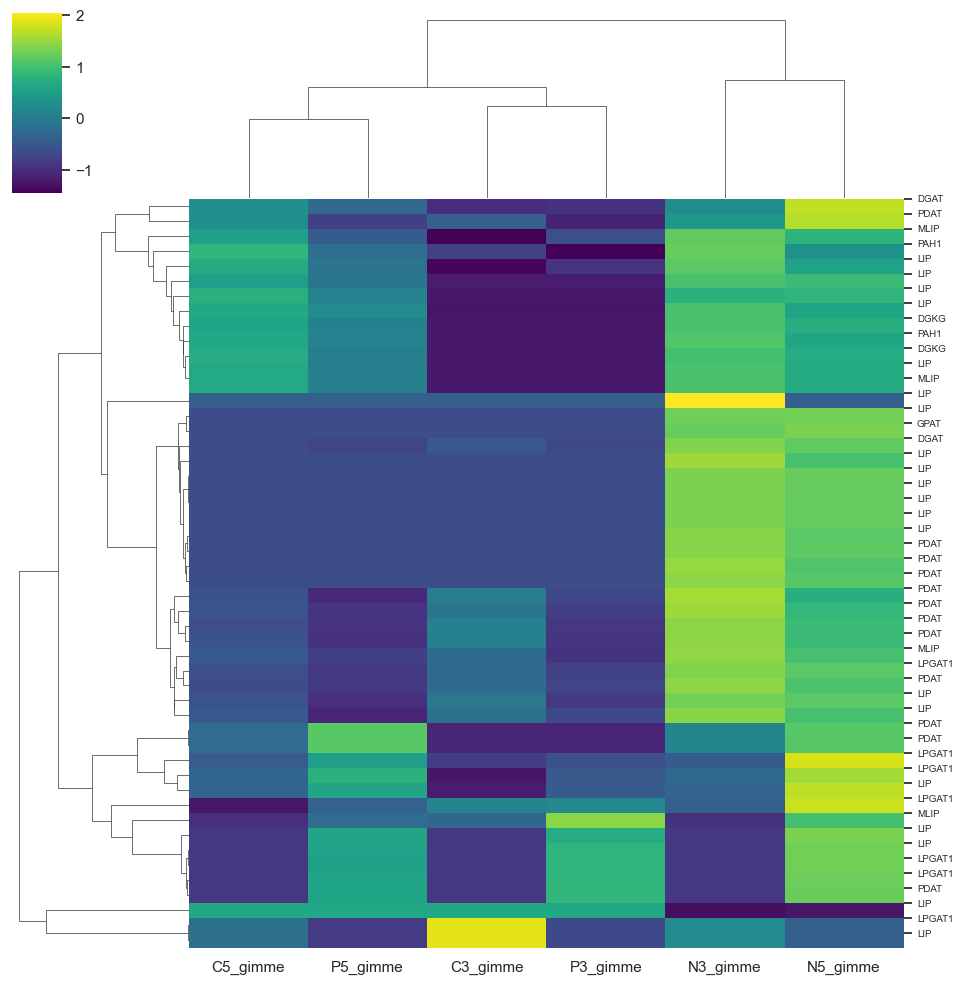

In [49]:
import numpy as np
np.random.seed(42)
from copy import deepcopy
tmp = deepcopy(bmgr)
# tmp.index= labels
# grouped_df = tmp.groupby(tmp.index).mean()
filtered_tmp = tmp.loc[tmp.var(axis=1).nlargest(50).index]
labels = []
ec_number_enzyme_map = {"3.1.1.3": "LIP", "2.3.1.20": "DGAT", "2.3.1.158": "PDAT", "1.14.19.25": "FAD3",
                       "3.1.1.23": "MLIP", "3.1.3.36": "INPP5K", "2.7.1.68": "PIP5K", "2.7.8.11": "PIS","3.1.3.4": "PAH1",
                       "1.14.19.30": "D5Des", "2.3.1.22": "LPGAT1", "1.14.19.47": "DES6", "1.14.19.22": "FAD2",
                       "1.14.19.25,1.14.19.35": "FAD3", "2.7.1.107": "DGKG", '1.14.19.25,1.14.19.36': "FAD3",
                       "1.14.19.45": "desA", "2.3.1.15": "GPAT", "2.3.1.51": "LPAT"}
for reaction in filtered_tmp.index.tolist():
    ec_number = model.reactions.get_by_id(reaction).annotation.get("ec-code", "")
    if isinstance(ec_number, list):
        ec_number = ','.join(ec_number)
    labels.append(ec_number_enzyme_map.get(ec_number, ""))
    # labels.append(ec_number)
labels
filtered_tmp.index=labels
g = sns.clustermap(filtered_tmp, cmap="viridis", z_score=0)
g.ax_heatmap.set_yticks(np.arange(filtered_tmp.shape[0]))
g.ax_heatmap.set_yticklabels(filtered_tmp.index, fontsize=7, rotation=0)

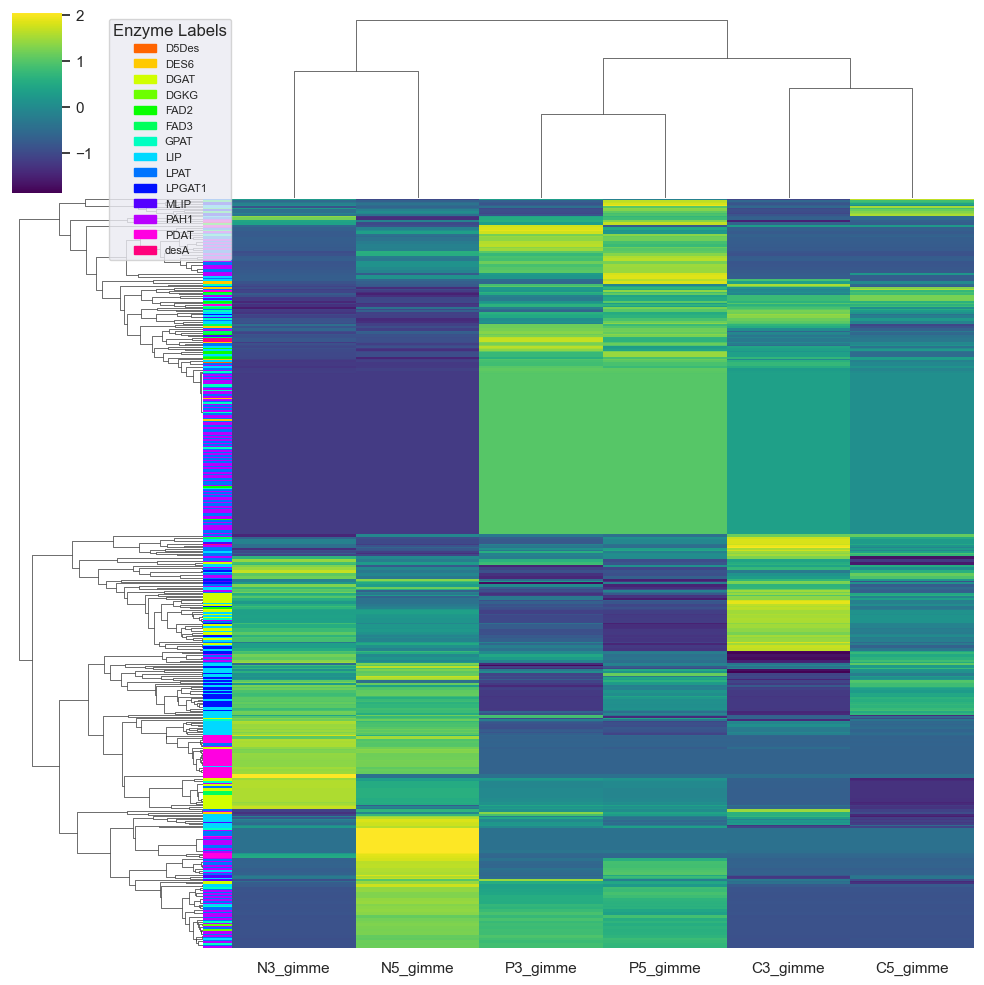

In [68]:
import numpy as np
import seaborn as sns
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from copy import deepcopy

# Set random seed and deepcopy
np.random.seed(42)
tmp = deepcopy(bmgr)

# Filter rows with the highest variance
filtered_tmp = tmp.loc[tmp.var(axis=1).nlargest(1000).index]

# Map reactions to enzyme labels
labels = []
ec_number_enzyme_map = {
    "3.1.1.3": "LIP", "2.3.1.20": "DGAT", "2.3.1.158": "PDAT", "1.14.19.25": "FAD3",
    "3.1.1.23": "MLIP", "3.1.3.36": "INPP5K", "2.7.1.68": "PIP5K", "2.7.8.11": "PIS", "3.1.3.4": "PAH1",
    "1.14.19.30": "D5Des", "2.3.1.22": "LPGAT1", "1.14.19.47": "DES6", "1.14.19.22": "FAD2",
    "1.14.19.25,1.14.19.35": "FAD3", "2.7.1.107": "DGKG", '1.14.19.25,1.14.19.36': "FAD3",
    "1.14.19.45": "desA", "2.3.1.15": "GPAT", "2.3.1.51": "LPAT"
}
for reaction in filtered_tmp.index.tolist():
    ec_number = model.reactions.get_by_id(reaction).annotation.get("ec-code", "")
    if isinstance(ec_number, list):
        ec_number = ','.join(ec_number)
    labels.append(ec_number_enzyme_map.get(ec_number, ""))

# Set filtered_tmp index to enzyme labels
filtered_tmp.index = labels

# Create a color mapping for the enzyme labels
unique_labels = sorted(set(labels))
label_colors_map = {label: sns.color_palette("hsv", len(unique_labels))[i] for i, label in enumerate(unique_labels)}
row_colors = filtered_tmp.index.map(label_colors_map)

# Create clustermap with row color bar
g = sns.clustermap(
    filtered_tmp,
    cmap="viridis",
    z_score=0,
    row_colors=row_colors,  # Add row colors
    yticklabels=False  # Disable y-tick labels
)

# ax_row_colors = g.ax_row_colors
# box = ax_row_colors.get_position()

# box_heatmap = g.ax_heatmap.get_position()
# ax_row_colors.set_position([box_heatmap.max[0], box.y0, box.width*1.5, box.height])

# Add enzyme label legend
legend_patches = [
    mpatches.Patch(color=color, label=label) for label, color in label_colors_map.items()
]
plt.legend(
    handles=legend_patches,
    loc="upper right",
    bbox_to_anchor=(4.5, 1),
    title="Enzyme Labels",
    fontsize=8
)

# # Adjust layout for better visualization
# plt.subplots_adjust(right=0.8)

In [24]:
DATA_PATH = r"/home/ecunha/omics-integration/data/ngaditana/"
RESULTS_PATH = r"/home/ecunha/omics-integration/results/ngaditana/PRJNA589063"
import json
def get_reactions_pathway_map(model_path: str):
    model = MyModel(model_path, "e_Biomass__cytop")
    json.dump(model.reactions_pathways_map, open(rf"{DATA_PATH}/reactions_pathways_map.json", "w"))
    json.dump(model.pathway_reactions_map, open(rf"{DATA_PATH}/pathways_reactions_map.json", "w"))
    reactions_pathways_map = json.load(open(rf"{DATA_PATH}/reactions_pathways_map.json", "r"))
    pathways_reactions_map = json.load(open(rf"{DATA_PATH}/pathways_reactions_map.json", "r"))
    return reactions_pathways_map, pathways_reactions_map, model

def load_data(filenames):
    """
    Load data from files
    :param filenames:
    :return:
    """
    res = {}
    for key, filename in filenames.items():
        tmp = pd.read_csv(filename, index_col=0, sep="\t")
        res[key] = [(tmp.loc[(abs(tmp['FC']) >= 0.0) & (tmp['Padj'] <= 0.05), :]) , pd.read_csv(filename.replace("_all_results.tsv", ".csv"))]
    return res
    
data = load_data({
    # join(RESULTS_PATH, "dfa/C5_fastcore_0.4_loopless_ACHR_P5_fastcore_0.4_loopless_ACHR_results.csv")
    # "C5 vs N5 FASTCORE": join(RESULTS_PATH, "dfa/C5_fastcore_0.4_loopless_ACHR_N5_fastcore_0.4_loopless_ACHR_all_results.tsv"),
    # "C5 vs P5 FASTCORE" : join(RESULTS_PATH, "dfa/C5_fastcore_0.4_loopless_ACHR_P5_fastcore_0.4_loopless_ACHR_all_results.tsv"),
    # "C5 vs N5 GIMME": join(RESULTS_PATH, "dfa/C5_gimme_0.4_loopless_ACHR_N5_gimme_0.4_loopless_ACHR_all_results.tsv"),
    # "C5 vs P5 GIMME": join(RESULTS_PATH, "dfa/C5_gimme_0.4_loopless_ACHR_P5_gimme_0.4_loopless_ACHR_all_results.tsv")
    "C5 vs N5 GIMME": join(RESULTS_PATH, "dfa/C5_gimme_0.4_ACHR_N5_gimme_0.4_ACHR_all_results.tsv"),
    # "C5 vs P5 GIMME": join(RESULTS_PATH, "dfa/C5_gimme_0.4_ACHR_P5_gimme_0.4_ACHR_all_results.tsv")
    # "C5 vs N5 GIMME": join(RESULTS_PATH, "dfa/C5_fastcore_0.4_ACHR_N5_fastcore_0.4_ACHR_all_results.tsv"),
    # "C5 vs P5 GIMME": join(RESULTS_PATH, "dfa/C5_fastcore_0.4_ACHR_P5_fastcore_0.4_ACHR_all_results.tsv")
    # join(RESULTS_PATH, "dfa/C3_gimme_0.4_loopless_ACHR_N3_gimme_0.4_loopless_ACHR_all_results.tsv")
})
reactions_pathways_map, pathways_reactions_map, model = get_reactions_pathway_map(join(DATA_PATH, "models/model_ng.xml"))

Loading

Reactions: 4437
Metabolites: 3771
Genes: 1333
Model loaded


In [41]:
from copy import deepcopy
def plot_heatmap():
    data = load_samples(RESULTS_PATH, methods={'gimme': 0.4}, samples=["C3", "C5", "N3", "N5", "P3", "P5"])
    # g = sns.clustermap(data['all'], cmap="viridis", yticklabels=False)
    # plt.setp(g.ax_heatmap.get_xticklabels(), rotation=45, fontsize=14)
    # plt.savefig(join(RESULTS_PATH, "ngaditana_heatmap_complete.png"), dpi=600)
    gimme = data['gimme']
    model = MyModel(f"{DATA_PATH}/models/model_ng.xml", "e_Biomass__cytop")
    bmgr = gimme.loc[(gimme.index.str.startswith("BMGR")) & (
            (gimme.index.isin(model.pathway_reactions_map["BOIMMG (TAG)"])) |
            ((gimme.index.isin(model.pathway_reactions_map["BOIMMG (DAG)"]))) |
            ((gimme.index.isin(model.pathway_reactions_map["BOIMMG (PA)"])))
    )]
    bmgr = bmgr.filter(regex="N3|C3|P3|C5|P5|N5_gimme")
    bmgr = bmgr.loc[~bmgr.index.str.contains("mem")]
    row_std = bmgr.std(axis=1)
    bmgr = bmgr[row_std != 0]
    bmgr.columns = [e.split("_")[0] for e in bmgr.columns]
    labels = get_enzymes_map(model, bmgr)
    tmp = deepcopy(bmgr)
    tmp.index = labels
    grouped_df = tmp.groupby(tmp.index).mean()
    return grouped_df
def get_enzymes_map(model, bmgr):
    labels = []
    ec_number_enzyme_map = {"3.1.1.3": "LIP", "2.3.1.20": "DGAT", "2.3.1.158": "PDAT", "1.14.19.25": "FAD3",
                            "3.1.1.23": "MLIP", "3.1.3.36": "INPP5K", "2.7.1.68": "PIP5K", "2.7.8.11": "PIS", "3.1.3.4": "PAH1",
                            "1.14.19.30": "D5Des", "2.3.1.22": "LPGAT1", "1.14.19.47": "DES6", "1.14.19.22": "FAD2",
                            "1.14.19.25,1.14.19.35": "FAD3", "2.7.1.107": "DGKG", '1.14.19.25,1.14.19.36': "FAD3",
                            "1.14.19.45": "desA", "2.3.1.15": "GPAT", "2.3.1.51": "LPAT"}
    for reaction in bmgr.index.tolist():
        ec_number = model.reactions.get_by_id(reaction).annotation.get("ec-code", "")
        if isinstance(ec_number, list):
            ec_number = ','.join(ec_number)
        labels.append(ec_number_enzyme_map.get(ec_number, ""))
    return labels

In [73]:
import numpy as np
def split_label(label, max_line_length=25):
    words = label.split()
    new_label = ""
    current_line = ""
    for word in words:
        if len(current_line) + len(word) + 1 > max_line_length:
            new_label += current_line + "\n"
            current_line = word
        else:
            if current_line:
                current_line += " " + word
            else:
                current_line = word
    new_label += current_line
    return new_label
def fc_plot(ax, data, pathways_map, condition_name, common_pathways, plot_number):

    np.random.seed(42)
    values = {}

    for pathway, reactions in pathways_map.items():
        values[pathway] = data.loc[data.index.isin(reactions)].FC.tolist()
    bar_width = 0.4


    for i, (pathway, value) in enumerate(values.items()):
        positive_vals = len([v for v in value if v > 0])
        negative_vals = len([v for v in value if v < 0])
        ax.barh(y=pathway, width=negative_vals, height=bar_width, color='r', label='Negative FC' if i == 0 else "")
        ax.barh(y=pathway, width=positive_vals, height=bar_width, color='g', label='Positive FC' if i == 0 else "")

    ax.set_yticklabels([split_label(label, 30) for label in values.keys()])
    for lab in ax.get_yticklabels():
        if lab.get_text().replace("\n", "") in common_pathways or lab.get_text().replace("\n", " ") in common_pathways:
            lab.set_fontweight('bold')
        lab.set_fontsize(7)

    ax.legend(fontsize=7)
    ax.set_xlabel('Number of Reactions', fontsize=7)
    # ax.set_title(' '.join(condition_name.split()[0:-1]))
    # add a letter on the topleft of the plot
    # ax.grid(True)
    ax.tick_params(axis='x', labelsize=7)
    number_letter_map = {0: 'A', 1: 'B'}
    # ax.text(-0.5, 1.04, number_letter_map[plot_number], fontsize=10, transform=ax.transAxes, fontweight='bold', va='top', ha='right')
    # ax.set_yticks(ha='right')


In [42]:
grouped_df = plot_heatmap()

Loading

Reactions: 4437
Metabolites: 3771
Genes: 1333
Model loaded


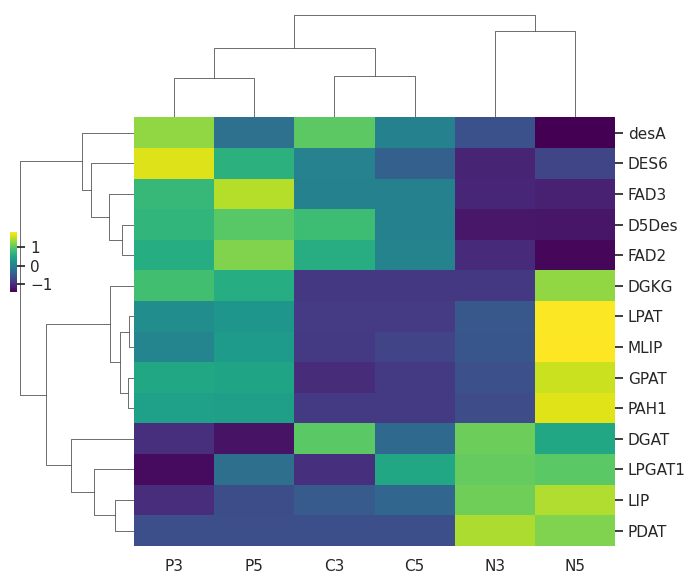

In [46]:
sns.clustermap(grouped_df, cmap="viridis", z_score=0, figsize=(7.08, 6), cbar_pos=(0.02, 0.5, 0.01, 0.1))

/tmp/ipykernel_2692104/3470900607.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([split_label(label, 30) for label in values.keys()])
/tmp/ipykernel_2692104/2520089854.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.ax_cbar.set_yticklabels(labels = g.ax_cbar.get_yticklabels(), fontsize=7)
/tmp/ipykernel_2692104/2520089854.py:21: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


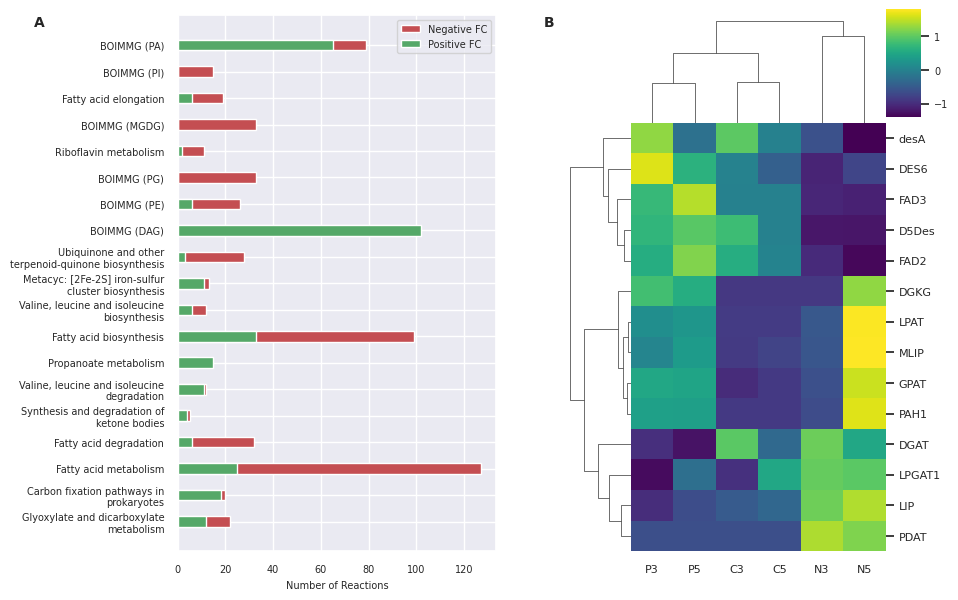

In [100]:
import matplotlib
g = sns.clustermap(grouped_df, cmap="viridis", z_score=0, figsize=(7.08, 6), cbar_pos=(0.02, 0.5, 0.01, 0.1))
plt.setp(g.ax_heatmap.get_xticklabels(), fontsize=8)
plt.setp(g.ax_heatmap.get_yticklabels(), fontsize=8)
g.gs.update(left=0.55, right=1.0)

# create new gridspec for the right part
gs2 = matplotlib.gridspec.GridSpec(1, 1, left=0, right=0.45)
# create axes within this new gridspec
ax2 = g.fig.add_subplot(gs2[0])

common_pathways = set() #set(data[list(data.keys())[0]][1].Pathways.tolist()).intersection(set(data[list(data.keys())[1]][1].Pathways.tolist()))
for i, (condition, df) in enumerate(data.items()):
    dfa_paths = data[list(data.keys())[i]][1].Pathways.tolist()
    fc_plot(ax2, data[list(data.keys())[i]][0], {pathway: reaction for pathway, reaction in pathways_reactions_map.items() if pathway in dfa_paths},
            condition, common_pathways, i)
g.ax_cbar.set_position([1, 0.8, 0.05, 0.18])
g.ax_cbar.set_yticklabels(labels = g.ax_cbar.get_yticklabels(), fontsize=7)
g.fig.text(-0.3, 1.25, 'B', fontsize=10, transform=g.ax_heatmap.transAxes, fontweight='bold', va='top', ha='right')
g.fig.text(-2.3, 1.25, 'A', fontsize=10, transform=g.ax_heatmap.transAxes, fontweight='bold', va='top', ha='right')
plt.tight_layout()

/tmp/ipykernel_2692104/900200421.py:1: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.ax_cbar.set_yticklabels(labels = g.ax_cbar.get_yticklabels(), fontsize=7)


[Text(1, -2.0, '−2'),
 Text(1, -1.0, '−1'),
 Text(1, 0.0, '0'),
 Text(1, 1.0, '1'),
 Text(1, 2.0, '2')]